# COVID-19 : India Data Analysis

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Preprocessing](#section302)<br/>
4. [Questions](#section4)
    - 4.1 [How are COVID-19 cases distributed across India?](#section401)<br/>
    - 4.2 [Which states have the highest and lowest number of cases?](#section402)<br/>
    - 4.3 [What is the overall trend in confirmed cases, recovered patients and number of deaths?](#section403)<br/>
    - 4.4 [How have the number of active cases changed since the first case was reported?](#section404)<br/>
    - 4.5 [What is the state-wise distribution of deaths across India?](#section405)<br/>
    - 4.6 [Which states have experienced the highest number of deaths thus far?](#section406)<br/>
    - 4.7 [Which states have conducted the highest number of tests?](#section407)<br/>
    - 4.8 [What is the state-wise rate of positive cases with respect to the total number of tests conducted?](#section408)<br/>
    - 4.9 [What is the recovery rate in india?](#section409)<br/>
    - 4.10 [Which states have the highest recovered percentage?](#section410)<br/>
    - 4.11 [What is the average death rate in India and how has it fluctuated over time?](#section411)<br/>
    - 4.12 [What is the age group distribution of cases?](#section412)<br/>
5. [Conclusion](#section5)<br/>  

<a id='section1'></a>
### 1. Problem Statement

This notebook explores the spread of COVID-19 in India by using various python libraries for visualization and numerical manipulation. We perform a preliminary __Exploratory Data Analysis(EDA)__ of our __covid_19_india__ dataset. We will then look into the states which have the highest number of cases and look at some testing data of these states and analyze how much testing states have done. This data will be analysed using some basic statistical tools and charts.

Our end goal in this notebook is to analyze the current spread of COVID-19 in India and visualizes the number of cases state-wise. We also look at the amount of new cases country-wise which will give us a picture of how well the virus is being contained.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Detection of mistakes 

<a id='section2'></a>
### 2. Data Loading and Description

In this project we will be using multiple datasets(one regarding the tracking of cases, another for to track the number of tests and lastly one to observe the distribution with respect to age group) so as to get a clearer picture of how COVID-19 has spread across the country and what age group is most effected by it. We also look at the number of tests conducted and how each state fares in terms of the same.

We will analyze and process these datasets in order to answer several questions.


__1. covid_19_india :__
- The dataset consists of data about the spread of COVID-19 across India.
- The dataset comprises of __State/Union Territory, cured, deaths and confirmed cases__ as columns and the tracking of these values daily with respect to the state. Below is a table showing names of the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Sno           | Serial Number of the rows                                 | 
| Date          | Date of the entry                                         |  
| Time          | Time of the entry                                         | 
| State/UnionTerritory| Name of the state or union territory that the case was reported in|
| ConfirmedIndianNational| Number of confirmed indian nationals             |
| ConfirmedForeignNational| Number of confirmed foreign nationals           |
| Cured| Number of cured cases           |
|Deaths| Number of deaths|

__2. StatewiseTestingDetails :__
 - The dataset consists of information about the number of tests conducted state-wise and the number of positive,negative and total samples tested.
 - The dataset comprises of __5 columns__ and each row is representative of a date. Below is a table showing names of all the columns we will be using and their descriptions.
        
| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Date           | Date of the entry                                                 | 
| State      | State in which the entry is made                        |  
| TotalSamples        | Total Number of tests conducted                                |
| Negative        | Number of negative test results                                    |
|Positive | Number of positive test results|


__3. AgeGroupDetails :__
 - The dataset consists of information about the age groups of covid patients.
 - The dataset comprises of __4 columns__ and each row is representative of an age group entry. Below is a table showing names of all the columns we will be using and their descriptions.
 
 
| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Sno           | Serial Number of entry                                                 | 
| AgeGroup      | Age group of the patients                        |  
| TotalCases        | Number of cases that fall into the specified age group                               |
| Percentage        | Percentage of cases that fall into the age group                                    |

__These datasets can be downloaded for updated dates. The dates used in this notebook are updated as of the day of publishing of the notebook.__ 

#### Importing packages

In [528]:
import pandas as pd
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [529]:
import cufflinks as cf
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [530]:
import os
os.environ["PROJ_LIB"] = "F:\\Downloads\\Anaconda\\Library\\share"
from mpl_toolkits.basemap import Basemap
import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

We have specified the __os.environ['PROJ_LIB']__ as Basemap requires us to point out the __epsg.py__ file for it to be imported. We will use Basemap to plot India and explore the state-wise distribution of customers on our telecom network's data.

#### Importing the Dataset

__COVID-19 cases statewise dataset__

In [581]:
india_state_stats = pd.read_csv('covid_19_india.csv')
india_state_stats.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


__COVID-19 statewise testing dataset__

In [582]:
india_state_tests = pd.read_csv('StatewiseTestingDetails.csv')
india_state_tests.tail()

,Date,State,TotalSamples,Negative,Positive
1535,2020-05-25,West Bengal,148049.0,NaN,3816.0
1536,2020-05-26,West Bengal,157277.0,NaN,4009.0
1537,2020-05-27,West Bengal,166513.0,NaN,4192.0
1538,2020-05-28,West Bengal,175769.0,NaN,4536.0
1539,2020-05-29,West Bengal,185051.0,NaN,4813.0


__COVID-19 age group distribution dataset__

In [583]:
age_group_df = pd.read_csv('AgeGroupDetails.csv')
age_group_df.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


<a id='section3'></a>
## 3. Data Profiling

- In the upcoming section we will first __understand our dataset__ using various pandas functionalities.
- Once we identify if there are any inconsistencies and shortcomings in the data, we can begin preprocessing it.
- In __preprocessing__, we will deal with erronous and missing values of columns. If necessary, we may also add columns to make analysis easier.

<a id='section301'></a>
### 3.1 Understanding the data

__COVID-19 cases statewise dataset__

In [584]:
india_state_stats.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [585]:
india_state_stats.describe()

,Sno,Cured,Deaths,Confirmed
count,2486.000000,2486.000000,2486.000000,2486.000000
mean,1243.500000,450.198713,39.407482,1279.502011
std,717.790708,1512.028450,155.718285,4380.670059
min,1.000000,0.000000,0.000000,0.000000
25%,622.250000,1.000000,0.000000,7.000000
50%,1243.500000,15.000000,1.000000,55.000000
75%,1864.750000,165.000000,11.000000,690.000000
max,2486.000000,26997.000000,2098.000000,62228.000000


In [586]:
india_state_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2486 non-null   int64 
 1   Date                      2486 non-null   object
 2   Time                      2486 non-null   object
 3   State/UnionTerritory      2486 non-null   object
 4   ConfirmedIndianNational   2486 non-null   object
 5   ConfirmedForeignNational  2486 non-null   object
 6   Cured                     2486 non-null   int64 
 7   Deaths                    2486 non-null   int64 
 8   Confirmed                 2486 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 174.9+ KB


In [587]:
india_state_stats.shape

(2486, 9)

__COVID-19 statewise testing dataset__

In [588]:
india_state_tests.describe()

,TotalSamples,Negative,Positive
count,1540.000000,1227.000000,1532.000000
mean,50077.170779,50106.903015,1938.069191
std,77724.088028,78346.224132,5255.291050
min,58.000000,0.000000,0.000000
25%,3550.000000,3778.500000,32.000000
50%,15509.500000,15134.000000,272.000000
75%,61231.500000,58522.000000,1576.500000
max,466550.000000,445668.000000,59546.000000


In [589]:
india_state_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1540 non-null   object 
 1   State         1540 non-null   object 
 2   TotalSamples  1540 non-null   float64
 3   Negative      1227 non-null   float64
 4   Positive      1532 non-null   float64
dtypes: float64(3), object(2)
memory usage: 60.3+ KB


In [590]:
india_state_tests.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [591]:
india_state_tests.shape

(1540, 5)

__COVID-19 age group distribution dataset__

In [592]:
age_group_df.describe()

,Sno,TotalCases
count,10.00000,10.000000
mean,5.50000,69.200000
std,3.02765,59.241127
min,1.00000,9.000000
25%,3.25000,23.250000
50%,5.50000,52.500000
75%,7.75000,106.250000
max,10.00000,172.000000


In [593]:
age_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [594]:
age_group_df.shape

(10, 4)

<a id='section302'></a>
### 3.2 Preprocessing

__COVID-19 cases statewise dataset__

We can now get rid of the columns that we will not be using. This will make our dataset more concise and easier to understand. We will remove the columns __'Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'__ as we will not be using them in the notebook.

In [595]:
india_state_stats.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)
india_state_stats.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [596]:
india_state_stats.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

From the above initial analysis of the data, we can see that the __Date__ column is of type object. We will convert it to a datetime type so that we will be able to sort and easily work with it.

In [597]:
india_state_stats['Date'] = pd.to_datetime(india_state_stats['Date'],format='%d/%m/%y')

In [598]:
india_state_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2486 non-null   datetime64[ns]
 1   State/UnionTerritory  2486 non-null   object        
 2   Cured                 2486 non-null   int64         
 3   Deaths                2486 non-null   int64         
 4   Confirmed             2486 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 97.2+ KB


As we can see, we have now converted the __Date__ column into datetime datatype.

In [599]:
df_sum = india_state_stats.sort_values('Date').groupby('Date').sum()
df_sum

,Cured,Deaths,Confirmed
Date,,,
2020-01-30,0,0,1
2020-01-31,0,0,1
2020-02-01,0,0,2
2020-02-02,0,0,3
2020-02-03,0,0,3
...,...,...,...
2020-05-26,60491,4167,145380
2020-05-27,64426,4337,151767
2020-05-28,67692,4531,158333


In [600]:
df_sum['Recovery %'] = (df_sum['Cured'] / df_sum['Confirmed']) * 100
df_sum['Death %'] = (df_sum['Deaths'] / df_sum['Confirmed']) * 100
df_sum['Active Cases'] = (df_sum['Confirmed'] - df_sum['Cured'] - df_sum['Deaths'])
df_sum

,Cured,Deaths,Confirmed,Recovery %,Death %,Active Cases
Date,,,,,,
2020-01-30,0,0,1,0.000000,0.000000,1
2020-01-31,0,0,1,0.000000,0.000000,1
2020-02-01,0,0,2,0.000000,0.000000,2
2020-02-02,0,0,3,0.000000,0.000000,3
2020-02-03,0,0,3,0.000000,0.000000,3
...,...,...,...,...,...,...
2020-05-26,60491,4167,145380,41.608887,2.866281,80722
2020-05-27,64426,4337,151767,42.450599,2.857670,83004
2020-05-28,67692,4531,158333,42.752932,2.861690,86110


In the above code, we used the groupby method with the sum aggregate function. We then add the columns __Recovery %, Death % and Active cases__ to allow us to further analyze the data.

__COVID-19 statewise testing dataset__

Similar to the previous dataset, the __Date__ column is of type object and not datetime. We will convert it to datetime so that we can order it and make working with the data easier.

In [601]:
india_state_tests['Date'] = pd.to_datetime(india_state_tests['Date'],format='%Y/%m/%d')

In [602]:
india_state_tests.isnull().sum()

Date              0
State             0
TotalSamples      0
Negative        313
Positive          8
dtype: int64

Our next issue is that there seem to be a large number of missing values in our data. Below, we will use a heatmap to visualize the amount of missing data.

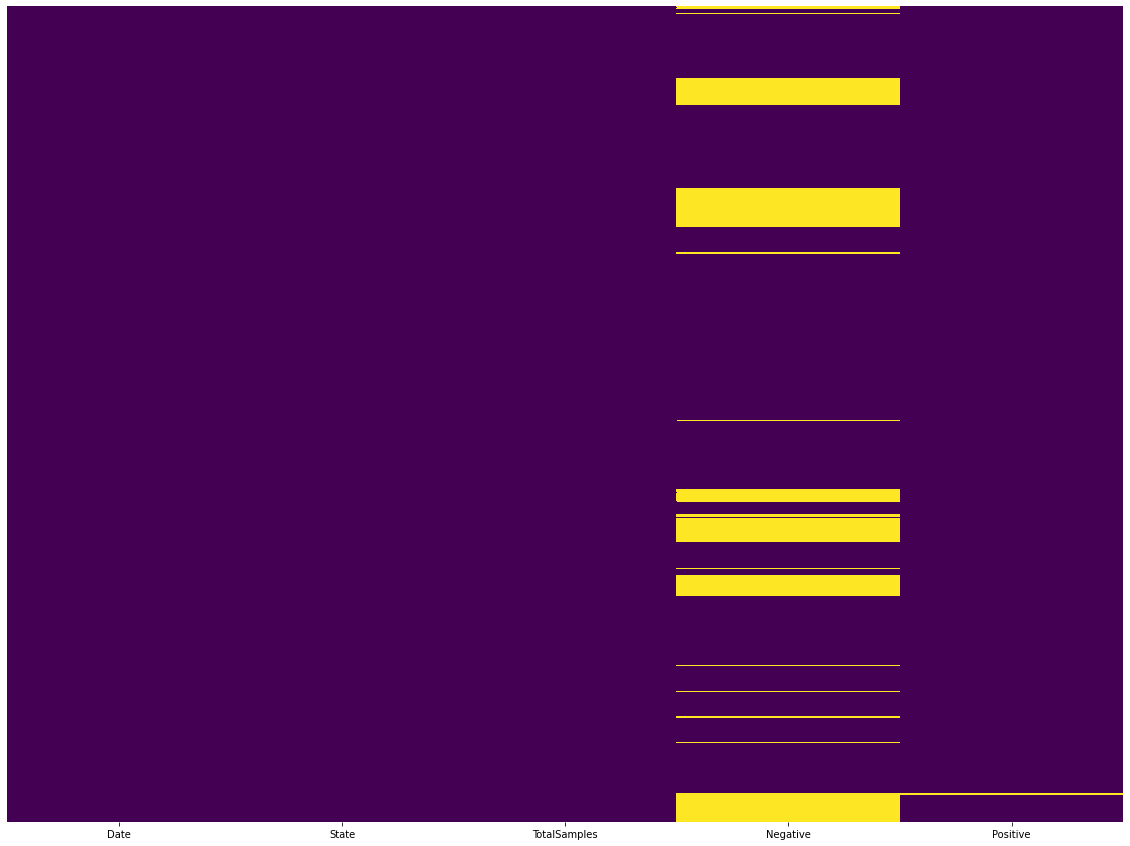

In [603]:
sns.heatmap(india_state_tests.isnull(),cmap='viridis',cbar=False,yticklabels=False)

Since a majority of the missing values are in the __Negative__ column, we can use the __Positive__ and __TotalSamples__ columns to fill the missing values in. We have a small number of values missing from the __Positive__ column but we can drop these entries as there is no way to fill them in and since they are very small in number, it shouldn't cause an issue.

In [604]:
india_state_tests['Negative'] = india_state_tests['TotalSamples'] - india_state_tests['Positive']

In [605]:
india_state_tests.dropna(inplace=True)
india_state_tests.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

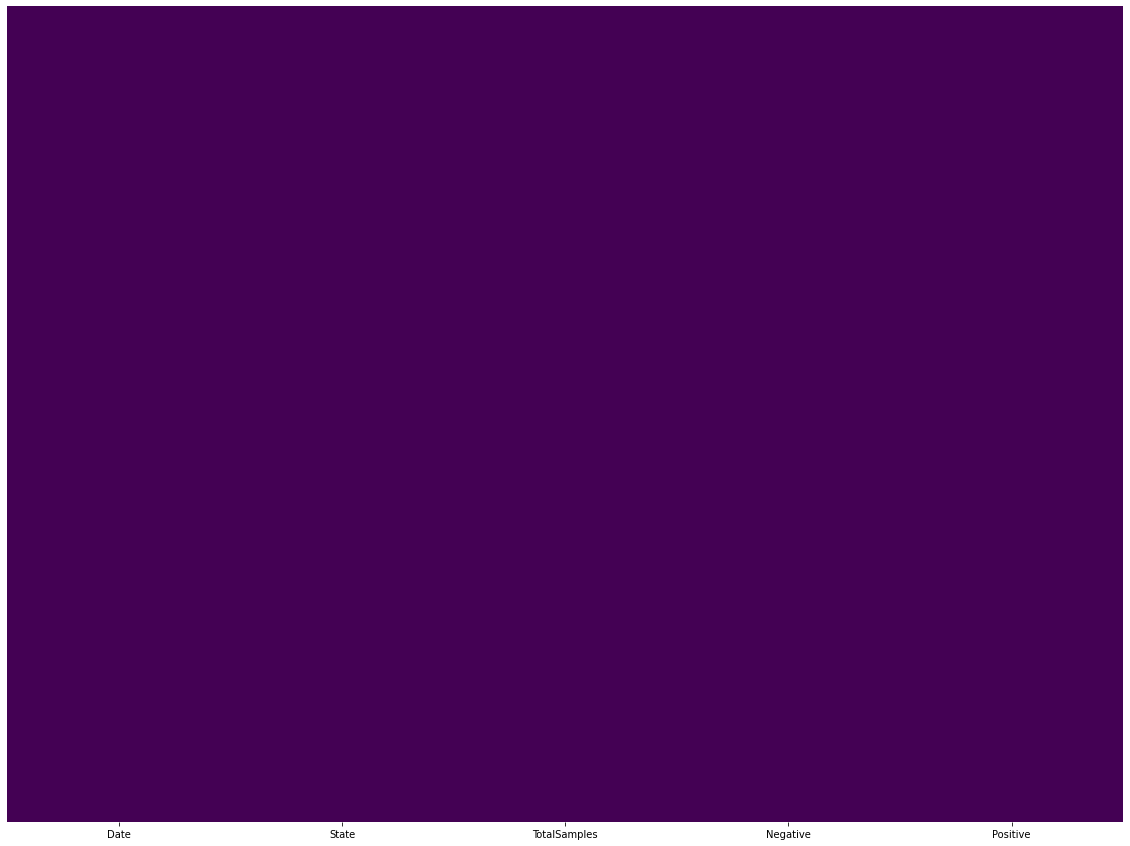

In [606]:
sns.heatmap(india_state_tests.isnull(),cmap='viridis',cbar=False,yticklabels=False)

Comparing the visualization above to the one before, we can see that we now do not have any missing values.

In [607]:
india_state_tests['% of positive cases'] = (india_state_tests['Positive']/india_state_tests['TotalSamples'])*100
india_state_tests.head()

,Date,State,TotalSamples,Negative,Positive,% of positive cases
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0,0.855310
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0,1.007839
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0,1.158708
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0,0.879062
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0,0.494234


Lastly, we will add another column called __% of positive cases__ which we will use further in this notebook.

<a id='section4'></a>
## 4. Questions

<a id='section401'></a>
### 4.1 How are COVID-19 cases distributed across India?

In [608]:
count_list = []
states_grouped = latest_state_data

for index,row in states_grouped.iterrows():
    count_list.append((row[1],row[4]))
count_list.pop()

('Cases being reassigned to states', 5043)

In [609]:
countlist = []

for state_count in m.INDIA_info:
    count1 = 0
    for x in count_list:
        if x[0] == state_count['NAME_1']:
            count1 += x[1]
            break
    countlist.append(count1)

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



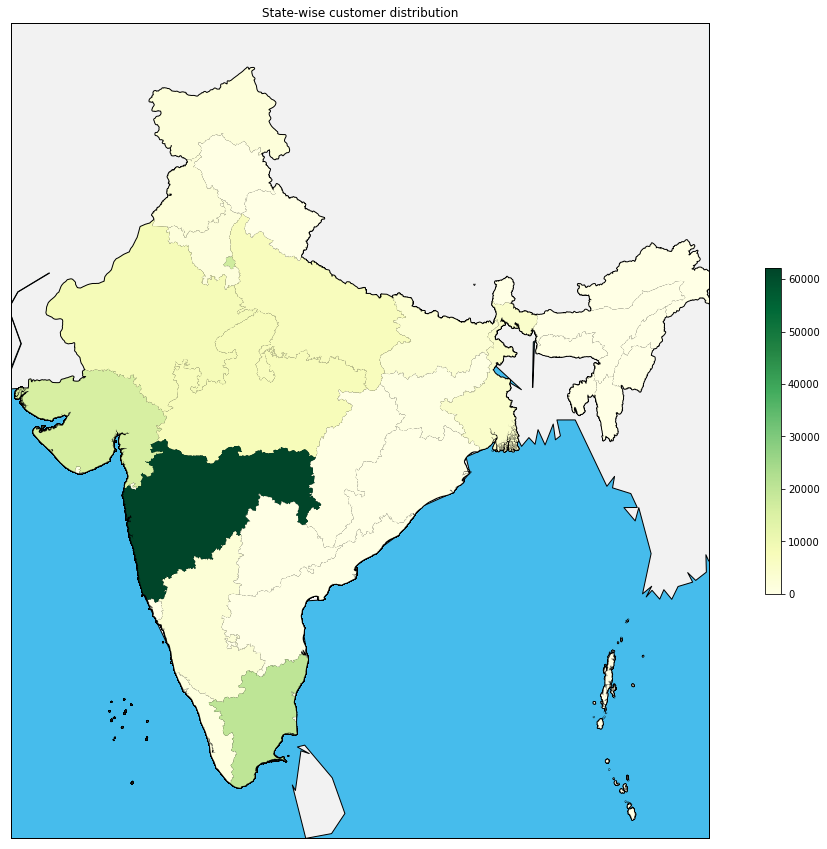

In [610]:
fig,ax = plt.subplots()
m = Basemap(resolution='c',projection='merc',lat_0=54.5,lon_0=-4.36,llcrnrlon=68.,llcrnrlat=6.,urcrnrlon=97.,urcrnrlat=37.)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('F:\\Downloads\\Anaconda\\Lib\\site-packages\\mpl_toolkits\\basemap\\IND_adm1','INDIA',linewidth=2)

df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['NAME_1'] for area in m.INDIA_info],
                       'countlist': countlist})

shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
#cmap = plt.get_cmap('Oranges')
cmap = plt.get_cmap('YlGn')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['countlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(countlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('State-wise customer distribution')
plt.rcParams['figure.figsize'] = [20,15]
plt.show()

From the above visual we get a clearer picture of the spread of the virus across India. We can see there are certain states that are responsible for a majority of the cases. We can also see that most cases are concentrated towards the __Western central__ part of India.

<a id='section402'></a>
### 4.2 Which states have the highest and lowest number of cases?

#### Highest cases:

In [561]:
latest_state_data = india_state_stats.tail(32)

In [562]:
latest_state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 2454 to 2485
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  32 non-null     datetime64[ns]
 1   State/UnionTerritory  32 non-null     object        
 2   Cured                 32 non-null     int64         
 3   Deaths                32 non-null     int64         
 4   Confirmed             32 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ KB


In [563]:
latest_state_data.sort_values('Confirmed',ascending=False).head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
2469,2020-05-30,Maharashtra,26997,2098,62228
2479,2020-05-30,Tamil Nadu,11313,154,20246
2458,2020-05-30,Delhi,7846,398,17386
2460,2020-05-30,Gujarat,8611,980,15934
2477,2020-05-30,Rajasthan,5244,184,8365
2468,2020-05-30,Madhya Pradesh,4269,334,7645
2483,2020-05-30,Uttar Pradesh,4244,198,7284
2485,2020-05-30,Cases being reassigned to states,0,0,5043
2484,2020-05-30,West Bengal,1775,302,4813
2454,2020-05-30,Bihar,1211,15,3376


In [564]:
latest_state_data.sort_values('Confirmed',ascending=False).head(10).iplot(kind='bar',x='State/UnionTerritory',y='Confirmed',width=2.5,size=20,color='green')

From the above graph we can clearly see that the state of __Maharashtra__ has the highest number of cases by far. __Tamil Nadu__ which is second in the list has only about 30% of the cases that __Maharashtra__ does.

#### Lowest cases:

In [565]:
latest_state_data.sort_values('Confirmed',ascending=True).head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
2478,2020-05-30,Sikkim,0,0,1
2472,2020-05-30,Mizoram,1,0,1
2457,2020-05-30,Dadar Nagar Haveli,0,0,2
2473,2020-05-30,Nagaland,0,0,25
2471,2020-05-30,Meghalaya,12,1,27
2475,2020-05-30,Puducherry,14,0,51
2470,2020-05-30,Manipur,8,0,59
2459,2020-05-30,Goa,41,0,69
2467,2020-05-30,Ladakh,43,0,74
2481,2020-05-30,Tripura,171,0,251


In [566]:
latest_state_data.sort_values('Confirmed',ascending=True).head(10).iplot(kind='bar',x='State/UnionTerritory',y='Confirmed',width=2.5,size=20,color='green')

As for the states with the lowest number of cases, __Sikkim__ and __Mizoram__ are the lowest with only 1 case each at the time of publishing this notebook.

<a id='section403'></a>
### 4.3 What is the overall trend in confirmed cases, recovered patients and number of deaths?

In [567]:
india_state_stats.sort_values('Date').groupby('Date').sum().iplot(width=2.5,size=20)

The number of confirmed cases as well as the number of cured patients seem to be increasing exponentially which the number of deaths seems to be increasing more linearly.

<a id='section404'></a>
### 4.4 How have the number of active cases changed since the first case was reported?

In [568]:
df_sum.sort_values('Date').groupby('Date').sum()['Active Cases'].iplot(width=2.5,size=20)

Since the number of active cases is a function of the number of confirmed cases, cured cases and deaths, as expected, we see that it also follows an exponential curve.

The current number of active cases is around __86,000__. This is roughly about half the number of total cases in the country.

<a id='section405'></a>
### 4.5 What is the state-wise distribution of deaths across India?

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



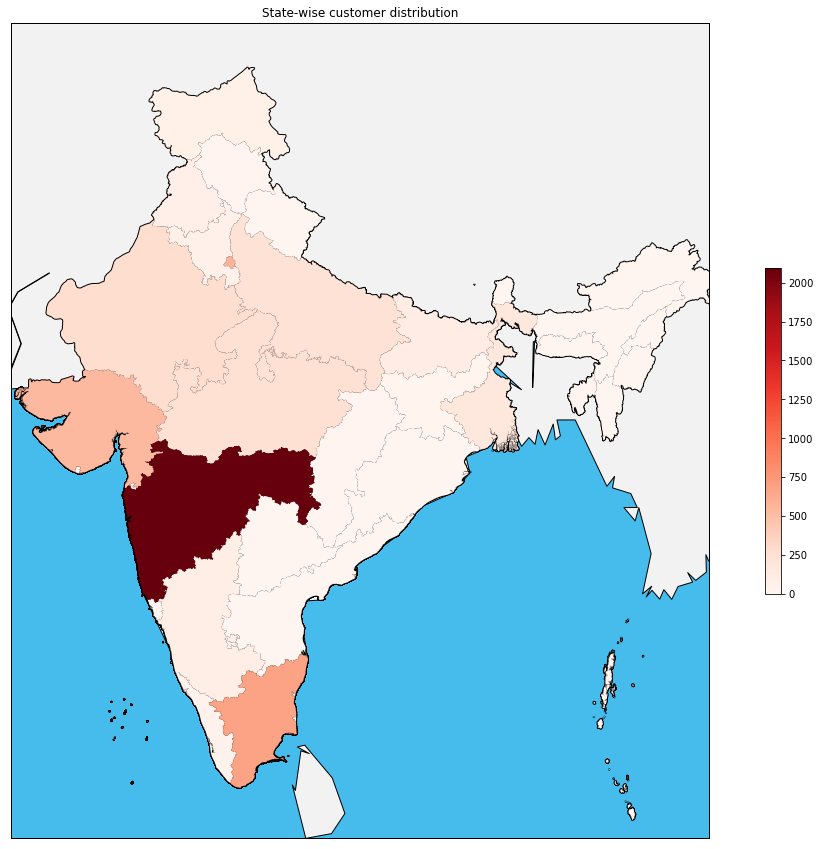

In [569]:
death_list = []
states_grouped = latest_state_data

for index,row in states_grouped.iterrows():
    death_list.append((row[1],row[3]))
death_list.pop()

countlist = []

for state_count in m.INDIA_info:
    count1 = 0
    for x in death_list:
        if x[0] == state_count['NAME_1']:
            count1 += x[1]
            break
    countlist.append(count1)

cmap = plt.get_cmap('Reds')
    
fig,ax = plt.subplots()
m = Basemap(resolution='c',projection='merc',lat_0=54.5,lon_0=-4.36,llcrnrlon=68.,llcrnrlat=6.,urcrnrlon=97.,urcrnrlat=37.)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('F:\\Downloads\\Anaconda\\Lib\\site-packages\\mpl_toolkits\\basemap\\IND_adm1','INDIA',linewidth=2)

    
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['countlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(countlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('State-wise customer distribution')
plt.rcParams['figure.figsize'] = [20,15]
plt.show()

Again, as we expect, the distribution of deaths across the country seems to follow the distribution of cases across the country as well. Most deaths have taken place in the Western central region of India.

<a id='section406'></a>
### 4.6 Which states have experienced the highest number of deaths thus far?

In [570]:
latest_state_data.sort_values(by='Deaths',ascending=False,inplace=True)
latest_state_data.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
2469,2020-05-30,Maharashtra,26997,2098,62228
2460,2020-05-30,Gujarat,8611,980,15934
2458,2020-05-30,Delhi,7846,398,17386
2468,2020-05-30,Madhya Pradesh,4269,334,7645
2484,2020-05-30,West Bengal,1775,302,4813


In [571]:
latest_state_data.head(10).iplot(kind='bar',x='State/UnionTerritory',y='Deaths',width=2.5,size=20)

Once again, __Maharashtra__ tops this list with the highest number of deaths with more than twice as many deaths as __Gujurat__ which comes in second place. From 4.2 we can see that __Tamil Nadu__ has the second most number of cases but from our graph we can see that that __Tamil Nadu__ is quite low on the list which shows that though the number of cases in __Tamil Nadu__ is high, the death rate is quite low when compared to states like __Maharashtra__ and __Gujarat__.

<a id='section407'></a>
### 4.7 Which states have conducted the highest number of tests?

In [572]:
india_state_tests.sort_values('Date',inplace=True)
india_state_tests_latest = india_state_tests.tail(30)

In [573]:
india_state_tests_latest.sort_values('TotalSamples',ascending=False).head(10)

,Date,State,TotalSamples,Negative,Positive,% of positive cases
1340,2020-05-29,Tamil Nadu,466550.0,446304.0,20246.0,4.339513
912,2020-05-29,Maharashtra,434565.0,375019.0,59546.0,13.702438
1262,2020-05-29,Rajasthan,379315.0,370950.0,8365.0,2.205291
55,2020-05-29,Andhra Pradesh,353874.0,351000.0,2874.0,0.812153
1431,2020-05-29,Uttar Pradesh,270920.0,263475.0,7445.0,2.748044
723,2020-05-29,Karnataka,264489.0,261708.0,2781.0,1.051461
467,2020-05-29,Gujarat,201481.0,185537.0,15944.0,7.913401
371,2020-05-29,Delhi,199626.0,182240.0,17386.0,8.709286
1539,2020-05-29,West Bengal,185051.0,180238.0,4813.0,2.600905
622,2020-05-29,Jammu and Kashmir,158729.0,156565.0,2164.0,1.363330


In [574]:
test_graph = india_state_tests_latest.sort_values('TotalSamples',ascending=False).head(10)
test_graph.sort_values('TotalSamples',ascending=True).iplot(kind='bar',x='State',y='TotalSamples',width=2.5,size=20,orientation='h',color='blue')

Most states that have conducted a high number of tests are those which also have the highest number of cases with a few exception such as __Karnataka__ and __Andhra Pradesh__.

<a id='section408'></a>
### 4.8 What is the state-wise rate of positive cases with respect to the total number of tests conducted?

In [575]:
india_state_tests_latest.sort_values('% of positive cases',ascending=False).head(10)

,Date,State,TotalSamples,Negative,Positive,% of positive cases
912,2020-05-29,Maharashtra,434565.0,375019.0,59546.0,13.702438
371,2020-05-29,Delhi,199626.0,182240.0,17386.0,8.709286
467,2020-05-29,Gujarat,201481.0,185537.0,15944.0,7.913401
237,2020-05-29,Chandigarh,4543.0,4254.0,289.0,6.361435
858,2020-05-29,Madhya Pradesh,155436.0,147791.0,7645.0,4.918423
186,2020-05-29,Bihar,72256.0,68980.0,3276.0,4.533880
1340,2020-05-29,Tamil Nadu,466550.0,446304.0,20246.0,4.339513
1431,2020-05-29,Uttar Pradesh,270920.0,263475.0,7445.0,2.748044
1208,2020-05-29,Punjab,81021.0,78824.0,2197.0,2.711643
1539,2020-05-29,West Bengal,185051.0,180238.0,4813.0,2.600905


This metric gives us an idea of how quickly the virus is spreading within each state. It also gives us a picture of how the states are handling the outbreak and how quickly they are able to detect,isolate and treat new cases.

Once again we can see that __Maharashtra__ tops the list with an almost 14% positivity rate. This means that for every 100 tests conducted in __Maharashtra__, about 14 of them will test positive for COVID-19.

<a id='section409'></a>
### 4.9 What is the recovery rate in india?

In [576]:
df_sum.sort_values('Date').groupby('Date').sum()['Recovery %'].iplot(width=2.5,size=20,color='green')

The recovery rate in India has shown a steady and somewhat linear increase ever since April 3rd. After a suddent spike on May 29th, at of the time of writing this notebook, the recovery rate is __47%__.

 <a id='section410'></a>
### 4.10 Which states have the highest recovered percentage?

In [577]:
latest_state_data['% Recovered'] = (latest_state_data['Cured']/latest_state_data['Confirmed'])*100
latest_state_data.sort_values('% Recovered',ascending=False)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,% Recovered
2472,2020-05-30,Mizoram,1,0,1,100.000000
2476,2020-05-30,Punjab,1949,42,2197,88.711880
2481,2020-05-30,Tripura,171,0,251,68.127490
2455,2020-05-30,Chandigarh,189,4,289,65.397924
2477,2020-05-30,Rajasthan,5244,184,8365,62.689779
2459,2020-05-30,Goa,41,0,69,59.420290
2483,2020-05-30,Uttar Pradesh,4244,198,7284,58.264690
2467,2020-05-30,Ladakh,43,0,74,58.108108
2480,2020-05-30,Telengana,1381,71,2425,56.948454
2479,2020-05-30,Tamil Nadu,11313,154,20246,55.877704


The table above shows the recovery percentage of individual states. An important factor to take note of, while analyzing this metric, is the number of confirmed cases. Though __Mizoram__ has a 100% recovery rate, it has only 1 confirmed case.

 <a id='section411'></a>
### 4.11 What is the average death rate in India and how has it fluctuated over time?

In [578]:
df_sum['Death %'].iplot(width=2.5,color='red')

The visualization above illustrates the change in death rate daily or the average number of deaths per 100 confirmed cases in India.

Though the death rate steadily increased from March 25th until April 13th, it seemed to flatten out and stay constant from April 14th to May 7th and is currently trending downwards.

It reached a maxumim value of __3.4%__ on the 13th of April and is currently at __2.86%__.

 <a id='section412'></a>
### 4.12 What is the age group distribution of cases?

In [579]:
age_group_df.iplot(kind='pie',labels='AgeGroup',values='TotalCases')

Most number of cases (24.9%) fall into the __20-29__ age group followed by the __30-39__ age group. In total 46% of the cases fall between the ages of __20__ and __39__.

<a id='section5'></a>
## 5. Conclusion 

- In this notebook, we used various numerical and visualization libraries to perform an Exploratory Data Analysis of COVID-19 data in India.
- We were able to sucessfully process the datasets by getting rid of irrelevant data or create new columns where necessary.
- We made use of packages like __pandas and plotly__ to develop better insights about the data using visualization. <br/>
- We have also seen how __preproceesing__ helps in dealing with __missing__ and __erroneous__ values and irregualities present in the data. We also _created new features_ which in turn help us to better understand the data.
- We used plotly to be able to visualize geographical data and better understand the spread of our data.
- These steps helped us in developing a deeper understanding of the spread of COVID-19 spread across India. We were able to understand the current situation and estimate how severely each state was hit by the virus.
- We were also able to see __how many tests__ individual states have conducted as well as what the positivity rate is in these different states.
- We also looked at metrics such as the __death rate__ and __recovery rate__ to understand how deadly the virus has been and at what rate people have been able to recover from the virus.<br/><br/>